In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import gc
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None)

In [2]:
PATH = '/media/axel/ssd/google-analytics/'

df = pd.read_csv(PATH + 'train.csv', parse_dates=['date'])

device_df = df.device.apply(json.loads).values.tolist()
device_df = pd.DataFrame.from_records(device_df)

geoNetwork_df = df.geoNetwork.apply(json.loads).values.tolist()
geoNetwork_df = pd.DataFrame.from_records(geoNetwork_df)

totals_df = df.totals.apply(json.loads).values.tolist()
totals_df = pd.DataFrame.from_records(totals_df)

trafficSource_df = df.trafficSource.apply(json.loads).values.tolist()
trafficSource_df = pd.DataFrame.from_records(trafficSource_df)

df.drop(['device', 'geoNetwork', 'totals', 'trafficSource'], axis=1, inplace=True)
df = pd.concat([df, geoNetwork_df, device_df, totals_df, trafficSource_df], axis=1)

del geoNetwork_df; del device_df; del totals_df; del trafficSource_df
gc.collect()



/home/axel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


7

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 50 columns):
channelGrouping              903653 non-null object
date                         903653 non-null datetime64[ns]
fullVisitorId                903653 non-null object
sessionId                    903653 non-null object
socialEngagementType         903653 non-null object
visitId                      903653 non-null int64
visitNumber                  903653 non-null int64
visitStartTime               903653 non-null int64
city                         903653 non-null object
cityId                       903653 non-null object
continent                    903653 non-null object
country                      903653 non-null object
latitude                     903653 non-null object
longitude                    903653 non-null object
metro                        903653 non-null object
networkDomain                903653 non-null object
networkLocation              903653 non-null object


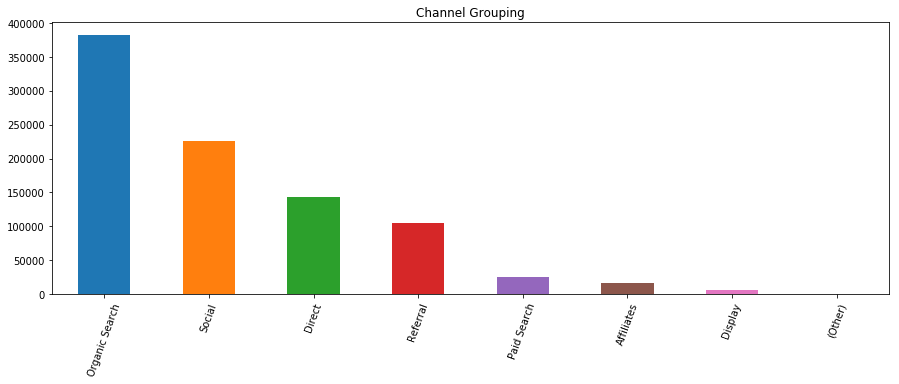

In [4]:
df.channelGrouping.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Channel Grouping");

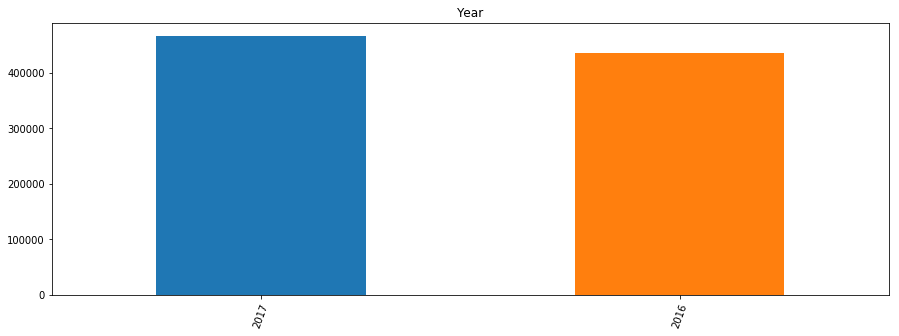

In [5]:
df.date.dt.year.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Year");

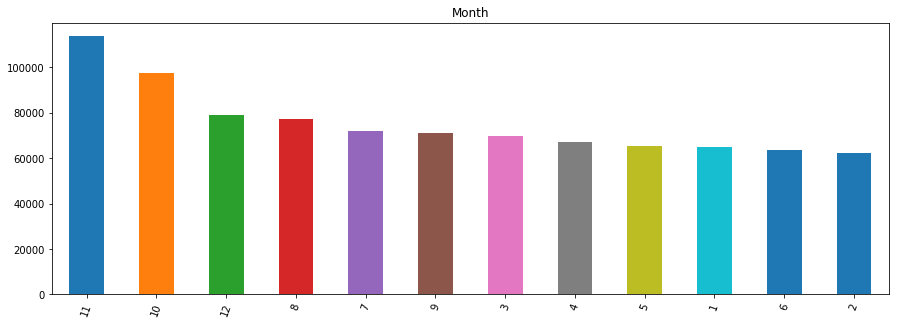

In [6]:
df.date.dt.month.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Month");

In [7]:
df.socialEngagementType.value_counts()

Not Socially Engaged    903653
Name: socialEngagementType, dtype: int64

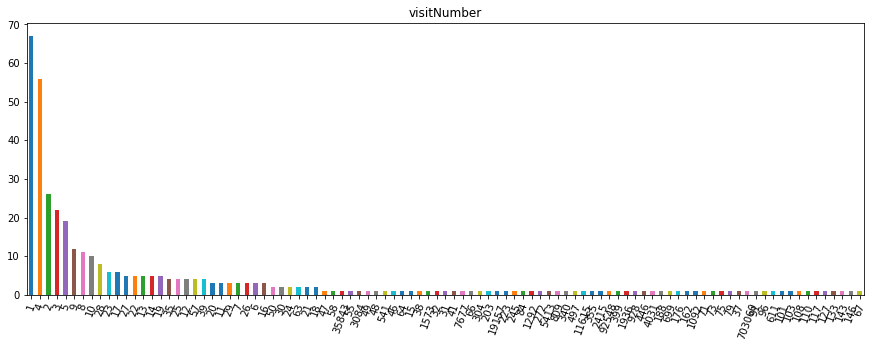

In [8]:
df.visitNumber.value_counts().value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="visitNumber");

In [9]:
df.city.value_counts()

not available in demo dataset    508229
Mountain View                     40884
(not set)                         34262
New York                          26371
San Francisco                     20329
Sunnyvale                         13086
London                            12607
San Jose                          10295
Los Angeles                        8670
Bangkok                            7709
Chicago                            7444
Ho Chi Minh City                   7342
Istanbul                           6330
Bengaluru                          5468
Toronto                            5223
Hanoi                              5032
Seattle                            5025
Sydney                             4926
Dublin                             4877
Sao Paulo                          4106
Mumbai                             4099
Chennai                            4090
Paris                              4013
Hyderabad                          3934
Austin                             3790


In [10]:
df.cityId.value_counts()

not available in demo dataset    903653
Name: cityId, dtype: int64

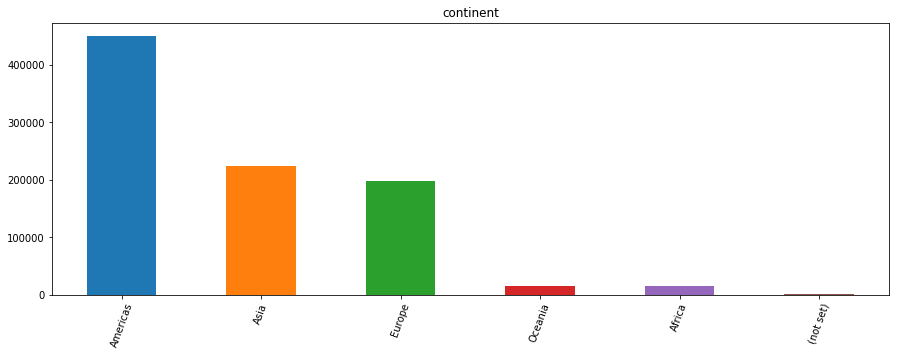

In [11]:
df.continent.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="continent");

In [12]:
df.country.value_counts()

United States               364744
India                        51140
United Kingdom               37393
Canada                       25869
Vietnam                      24598
Turkey                       20522
Thailand                     20123
Germany                      19980
Brazil                       19783
Japan                        19731
France                       15832
Mexico                       13225
Taiwan                       12996
Australia                    12698
Russia                       11662
Spain                        11658
Netherlands                  11453
Italy                        11332
Poland                        9693
Indonesia                     9273
Philippines                   9244
Singapore                     7172
Ireland                       6493
Malaysia                      6439
Romania                       6428
Ukraine                       5577
Israel                        5563
Peru                          5546
Sweden              

In [13]:
df.latitude.value_counts()

not available in demo dataset    903653
Name: latitude, dtype: int64

In [14]:
df.longitude.value_counts()

not available in demo dataset    903653
Name: longitude, dtype: int64

In [15]:
df.metro.value_counts()

not available in demo dataset                508229
(not set)                                    201766
San Francisco-Oakland-San Jose CA             95913
New York NY                                   26917
London                                        12571
Los Angeles CA                                 9995
Seattle-Tacoma WA                              7642
Chicago IL                                     7585
Austin TX                                      3790
Washington DC (Hagerstown MD)                  3380
Boston MA-Manchester NH                        2628
Houston TX                                     2475
Atlanta GA                                     2463
Detroit MI                                     2403
Roanoke-Lynchburg VA                           2227
Dallas-Ft. Worth TX                            2012
San Diego CA                                   1364
Portland OR                                    1319
Pittsburgh PA                                  1076
Denver CO   

In [16]:
df.networkDomain.value_counts()

(not set)                 244881
unknown.unknown           146034
comcast.net                28743
rr.com                     14827
verizon.net                13637
ttnet.com.tr               13228
comcastbusiness.net         9985
hinet.net                   7919
virginm.net                 6414
3bb.co.th                   6046
prod-infinitum.com.mx       5960
cox.net                     5812
sbcglobal.net               5388
btcentralplus.com           5304
att.net                     5230
google.com                  5035
optonline.net               4972
totbb.net                   4895
vnpt.vn                     4508
asianet.co.th               4374
pldt.net                    4008
rima-tde.net                3963
amazonaws.com               3769
t-ipconnect.de              3656
telecomitalia.it            3571
qwest.net                   3534
airtelbroadband.in          3389
virtua.com.br               3318
bell.ca                     2904
ztomy.com                   2845
          

In [17]:
df.networkLocation.value_counts()

not available in demo dataset    903653
Name: networkLocation, dtype: int64

In [18]:
df.region.value_counts()

not available in demo dataset    508229
California                       107495
(not set)                         27827
New York                          26433
England                           13198
Texas                              8749
Bangkok                            7709
Washington                         7642
Illinois                           7585
Ho Chi Minh                        7250
Istanbul                           6330
Maharashtra                        6184
Ontario                            5997
Taipei City                        5789
Karnataka                          5476
Delhi                              5278
Hanoi                              5141
New South Wales                    4932
Tamil Nadu                         4632
Ile-de-France                      4338
State of Sao Paulo                 4189
Telangana                          3955
County Dublin                      3650
Tel Aviv District                  3633
Tokyo                              3341


In [19]:
df.subContinent.value_counts()

Northern America      390657
Southeast Asia         77800
Southern Asia          59321
Western Europe         59114
Northern Europe        58168
Eastern Asia           46919
Eastern Europe         45249
South America          41731
Western Asia           38443
Southern Europe        35780
Central America        15583
Australasia            14893
Northern Africa         7683
Western Africa          2573
Caribbean               2406
Southern Africa         2169
Eastern Africa          1927
(not set)               1468
Central Asia            1215
Middle Africa            393
Melanesia                 81
Micronesian Region        55
Polynesia                 25
Name: subContinent, dtype: int64

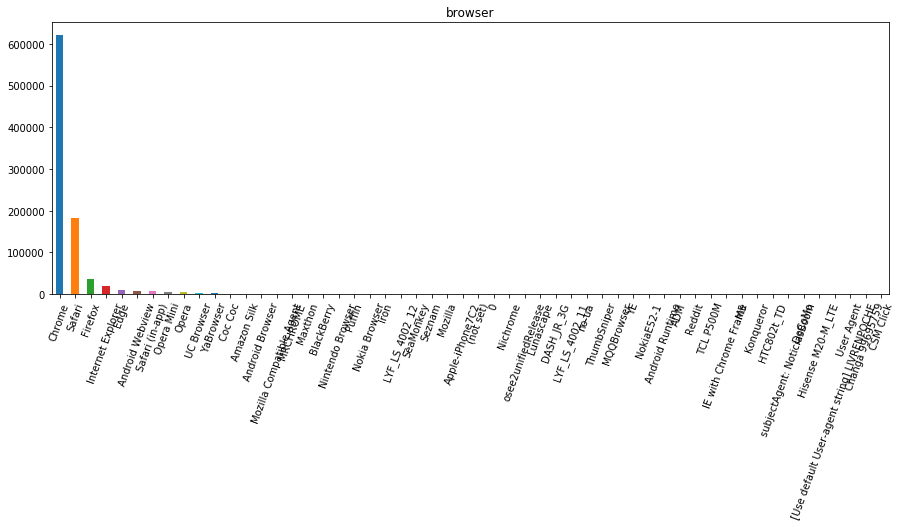

In [20]:
df.browser.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="browser");

In [21]:
df.browserSize.value_counts()

not available in demo dataset    903653
Name: browserSize, dtype: int64

In [22]:
df.browserVersion.value_counts()

not available in demo dataset    903653
Name: browserVersion, dtype: int64

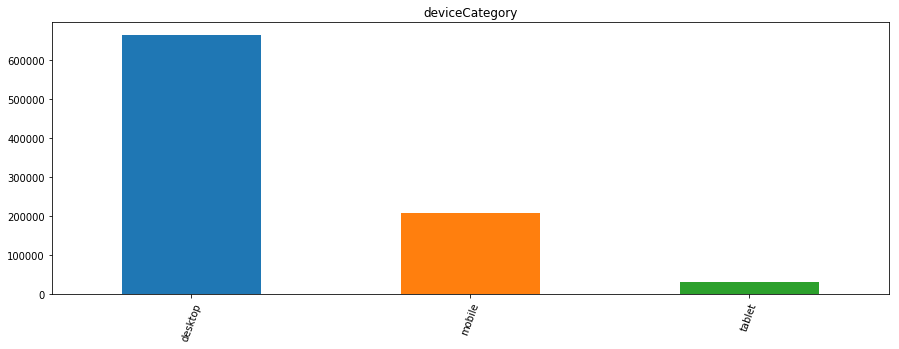

In [23]:
df.deviceCategory.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="deviceCategory");

In [24]:
df.flashVersion.value_counts()

not available in demo dataset    903653
Name: flashVersion, dtype: int64

In [25]:
df.isMobile.value_counts()

False    664530
True     239123
Name: isMobile, dtype: int64

In [26]:
df.language.value_counts()

not available in demo dataset    903653
Name: language, dtype: int64

In [27]:
df.mobileDeviceBranding.value_counts()

not available in demo dataset    903653
Name: mobileDeviceBranding, dtype: int64

In [28]:
df.mobileDeviceInfo.value_counts()

not available in demo dataset    903653
Name: mobileDeviceInfo, dtype: int64

In [29]:
df.mobileDeviceMarketingName.value_counts()

not available in demo dataset    903653
Name: mobileDeviceMarketingName, dtype: int64

In [30]:
df.mobileDeviceModel.value_counts()

not available in demo dataset    903653
Name: mobileDeviceModel, dtype: int64

In [31]:
df.mobileInputSelector.value_counts()

not available in demo dataset    903653
Name: mobileInputSelector, dtype: int64

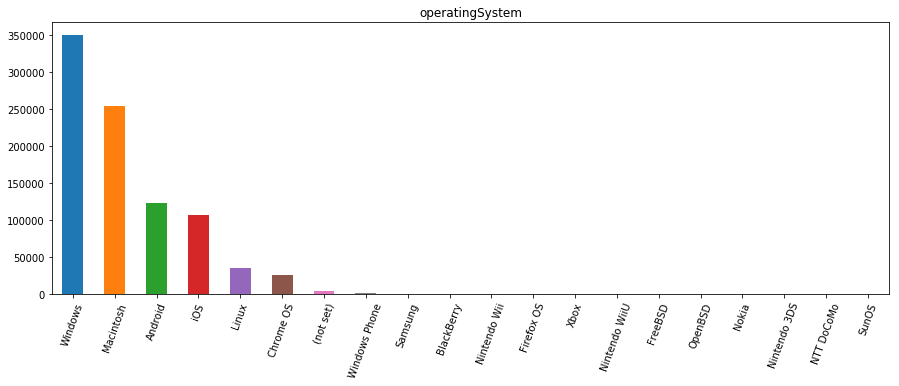

In [32]:
df.operatingSystem.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="operatingSystem");

In [33]:
df.operatingSystemVersion.value_counts()

not available in demo dataset    903653
Name: operatingSystemVersion, dtype: int64

In [34]:
df.screenColors.value_counts()

not available in demo dataset    903653
Name: screenColors, dtype: int64

In [35]:
df.screenResolution.value_counts()

not available in demo dataset    903653
Name: screenResolution, dtype: int64

In [36]:
df.bounces.value_counts()

1    450630
Name: bounces, dtype: int64

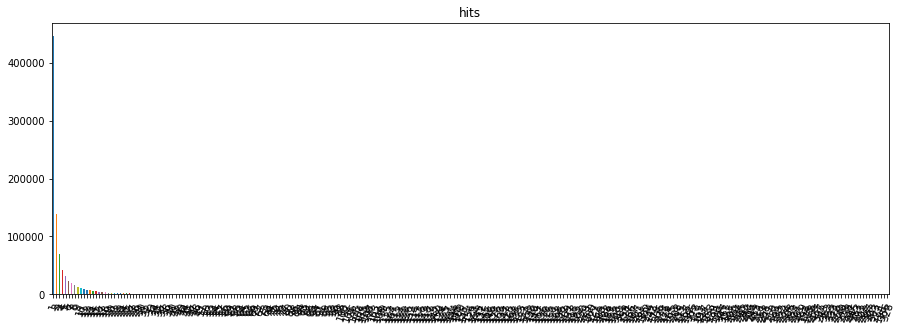

In [37]:
df.hits.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="hits");

In [38]:
df.newVisits.value_counts()

1    703060
Name: newVisits, dtype: int64

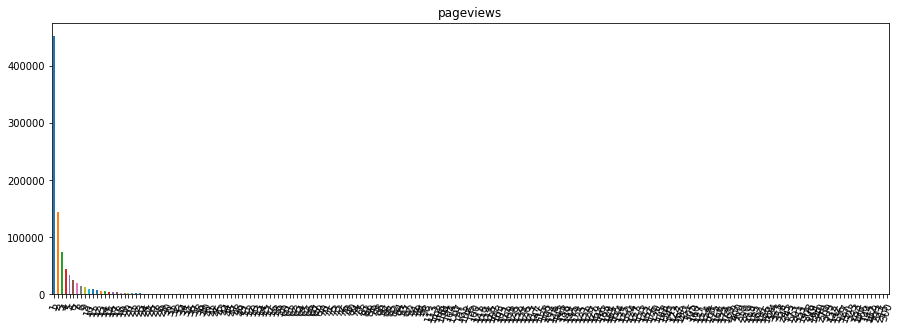

In [39]:
df.pageviews.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="pageviews");

In [40]:
df.visits.value_counts()

1    903653
Name: visits, dtype: int64

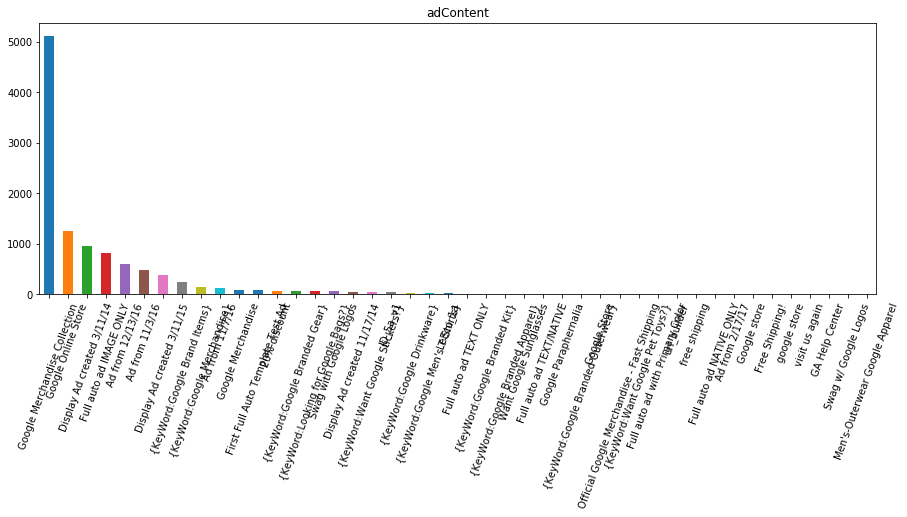

In [41]:
df.adContent.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="adContent");

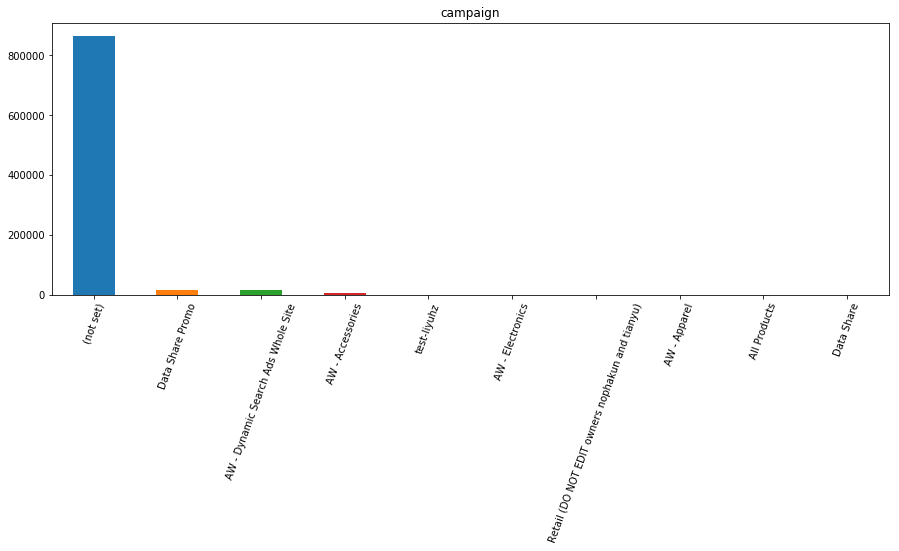

In [51]:
df.campaign.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="campaign");

In [52]:
df.campaignCode.value_counts()

11251kjhkvahf    1
Name: campaignCode, dtype: int64

In [56]:
df.keyword.value_counts()

(not provided)                                 366363
6qEhsCssdK0z36ri                                11503
(Remarketing/Content targeting)                  2298
1hZbAqLCbjwfgOH7                                 2264
google merchandise store                         2209
Google Merchandise                               1648
google store                                     1277
youtube                                           568
(User vertical targeting)                         489
1X4Me6ZKNV0zg-jV                                  467
(automatic matching)                              427
+google +store                                    377
+Google +Merchandise                              352
(content targeting)                               299
+google +merchandise +store                       258
YouTube Merchandise                               254
youtube merch                                     247
google merchandise                                238
google merch                

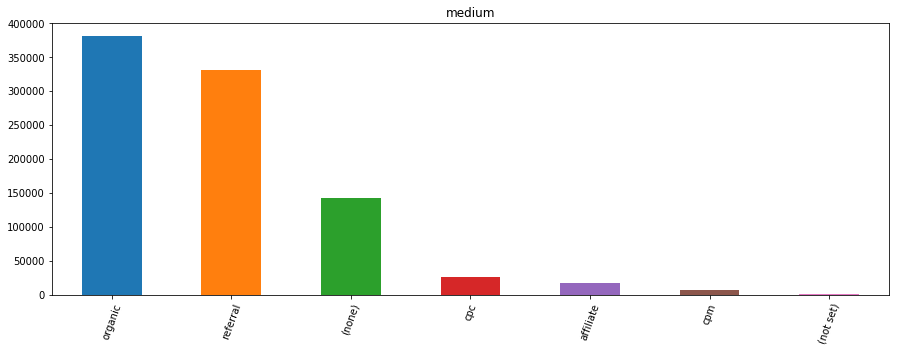

In [58]:
df.medium.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="medium");

In [59]:
df.referralPath.value_counts()

/                                                                                                                                                                                  75523
/yt/about/                                                                                                                                                                         71036
/analytics/web/                                                                                                                                                                    14620
/yt/about/tr/                                                                                                                                                                      14599
/yt/about/vi/                                                                                                                                                                      13753
/yt/about/es-419/                                                          

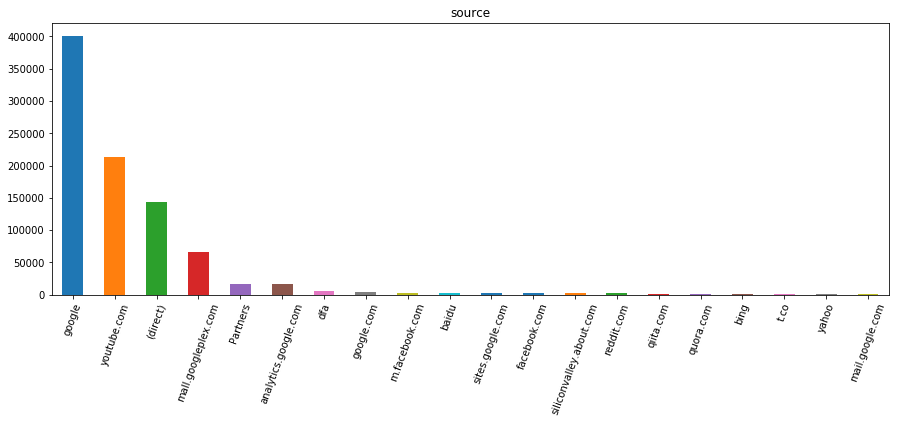

In [62]:
df.source.value_counts()[:20].plot(kind='bar', figsize=(15, 5), rot=70, title="source");

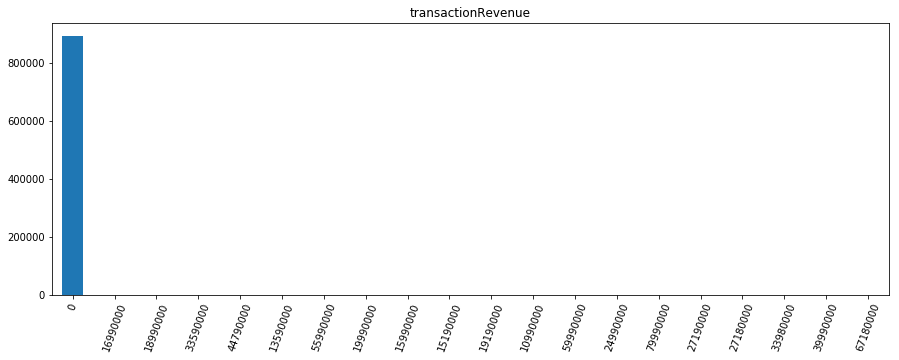

In [6]:
df['transactionRevenue'] = df.transactionRevenue.fillna(0)

df['transactionRevenue'].value_counts()[:20].plot(kind='bar', figsize=(15, 5), rot=70, title="transactionRevenue");

In [19]:
agg_dict = {}
for col in ["bounces", "hits", "newVisits", "pageviews", "transactionRevenue"]:
    df[col] = df[col].astype('float')
    agg_dict[col] = "sum"
tmp = df.groupby("fullVisitorId").agg(agg_dict).reset_index()

In [33]:
tmp2 = tmp['transactionRevenue'].replace(0, 2)

/home/axel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


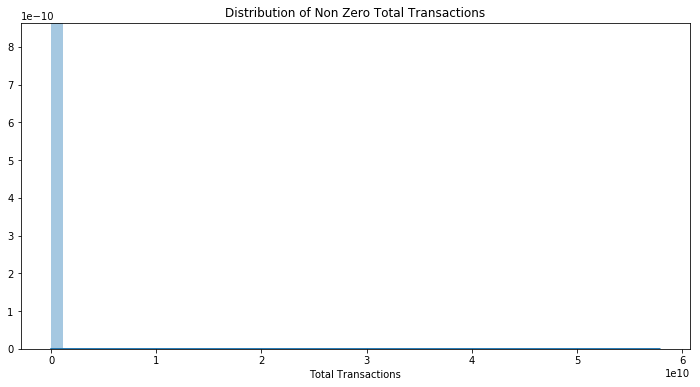

In [34]:
plt.figure(figsize=(12,6))
sns.distplot(tmp2)
plt.title("Distribution of Non Zero Total Transactions");
plt.xlabel("Total Transactions");

/home/axel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


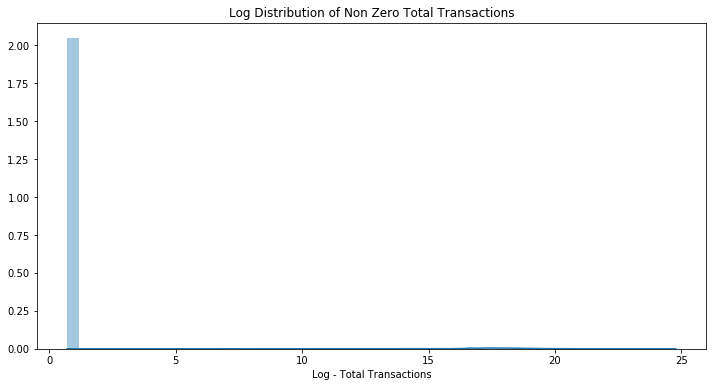

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(np.log1p(tmp2))
plt.title("Log Distribution of Non Zero Total Transactions");
plt.xlabel("Log - Total Transactions");